# 📊 Eksplorasi Data

Eksplorasi Data (Exploratory Data Analysis / EDA) merupakan tahap awal yang sangat penting dalam proses analisis data.  
Tujuan dari eksplorasi data adalah untuk memahami struktur, pola, dan karakteristik utama dari dataset yang digunakan.  

Beberapa hal yang biasanya dilakukan pada tahap EDA, antara lain:
- Melihat bentuk umum dataset (jumlah baris, kolom, dan tipe data).
- Mengecek apakah ada data yang hilang (*missing values*).
- Mengetahui distribusi data.
- Mengidentifikasi adanya nilai ekstrem (*outliers*).
- Membuat visualisasi awal untuk memahami hubungan antar variabel.

Tahap ini membantu kita menemukan insight awal sebelum melakukan pemodelan lebih lanjut.  
Dengan eksplorasi data, kita bisa memastikan kualitas dataset serta memilih metode analisis yang tepat.

---


## Memuat Data

In [30]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

# --- Pengaturan Koneksi ke Sumber Data Asli (PostgreSQL) ---
# Ganti dengan detail koneksi PostgreSQL Anda
db_user = 'postgres'
db_password = '123456789' # Ganti dengan password Anda
db_host = 'localhost'
db_port = '5432'
db_name = 'sains_data'
table_name = 'penjualan' 

# --- Ambil Data dari PostgreSQL ---
try:
    # Membuat koneksi ke database
    connection_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
    engine = create_engine(connection_url)
    
    # Menjalankan query untuk mengambil seluruh data dari tabel
    query = f'SELECT * FROM {table_name}'
    df = pd.read_sql(query, engine)

    print(f"Data dari tabel '{table_name}' di PostgreSQL berhasil dimuat.")
    print("5 baris data pertama:")
    display(df.head())

except Exception as e:
    print(f"Terjadi error saat menghubungkan ke PostgreSQL: {e}")

Data dari tabel 'penjualan' di PostgreSQL berhasil dimuat.
5 baris data pertama:


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


## laporan tipe data

In [31]:
# Melihat informasi dasar DataFrame, termasuk tipe data
print("--- Laporan Tipe Data ---")
print("Tipe data asli untuk setiap kolom:")
df.info()

--- Laporan Tipe Data ---
Tipe data asli untuk setiap kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 1

## laporan missing values

In [32]:
# Menghitung jumlah missing values di setiap kolom
print("\n--- Laporan Missing Values ---")
print("Jumlah data yang hilang (ditandai '?') di setiap kolom:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) # Hanya tampilkan kolom yang punya missing value

# --- BARIS TAMBAHAN ---
# Menghitung jumlah total missing values di seluruh dataset
total_missing_values = missing_values.sum()
print(f"\nJumlah total missing values di seluruh dataset: {total_missing_values}")


--- Laporan Missing Values ---
Jumlah data yang hilang (ditandai '?') di setiap kolom:
Series([], dtype: int64)

Jumlah total missing values di seluruh dataset: 0


## 📊 Penjelasan Deteksi Outlier pada Kolom `Age`

Kode ini digunakan untuk **mendeteksi outlier** pada kolom `Age` dalam dataset `risk_factors_cervical_cancer.csv`.  
Metode yang digunakan adalah **Interquartile Range (IQR Method)**.  

---

### 📌 Langkah-langkah:

1. **Cari Q1 (Kuartil 1)**  
   - Titik 25% pertama dari data yang sudah diurutkan.  
   - Contoh: jika ada 100 data umur, Q1 adalah data pada posisi ke-25.  

2. **Cari Q3 (Kuartil 3)**  
   - Titik 75% dari data yang sudah diurutkan.  
   - Contoh: jika ada 100 data umur, Q3 adalah data pada posisi ke-75.  

3. **Hitung IQR**  
   - Rumus:  
     \[
     IQR = Q3 - Q1
     \]  
   - Hasilnya menunjukkan “jarak” 50% data di tengah (sebaran utama).  

4. **Tentukan Batas Outlier**  
   - **Batas bawah**:  
     \[
     Q1 - 1.5 \times IQR
     \]  
   - **Batas atas**:  
     \[
     Q3 + 1.5 \times IQR
     \]  

5. **Identifikasi Outlier**  
   - Data yang **lebih kecil dari batas bawah** atau **lebih besar dari batas atas** dianggap **outlier**.  

---

### ✨ Inti dari IQR
- IQR fokus pada bagian tengah data (antara Q1 dan Q3).  
- Data yang terlalu jauh di luar sebaran ini dianggap **ekstrem** → disebut **outlier**.  



--- Laporan Outlier untuk Kolom 'Age' ---
Batas bawah dianggap outlier: 2.00
Batas atas dianggap outlier: 50.00
Jumlah outlier yang terdeteksi: 8


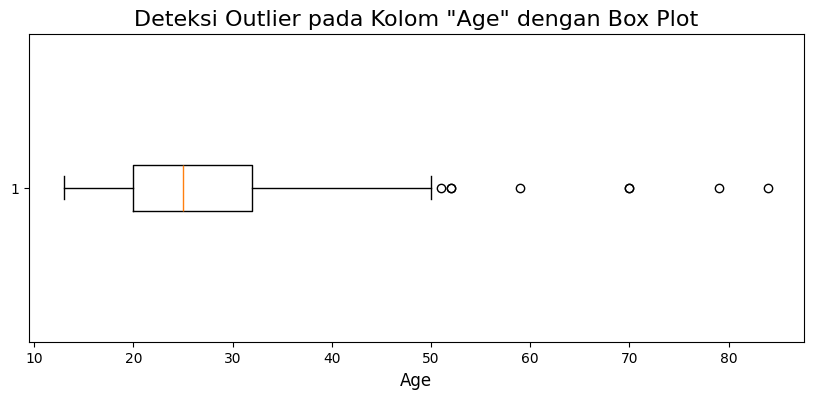

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Asumsikan 'df' sudah dimuat dari langkah sebelumnya
# df = pd.read_csv('risk_factors_cervical_cancer.csv', na_values='?')

# --- Laporan Outlier ---
# Kita perlu mengubah kolom 'Age' menjadi numerik HANYA untuk perhitungan ini
# tanpa mengubah DataFrame aslinya.
age_numeric = pd.to_numeric(df['Age'], errors='coerce')

# Hitung Q1, Q3, dan IQR
Q1 = age_numeric.quantile(0.25)
Q3 = age_numeric.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Identifikasi dan hitung outliers
outliers = age_numeric[(age_numeric < batas_bawah) | (age_numeric > batas_atas)]

print(f"\n--- Laporan Outlier untuk Kolom 'Age' ---")
print(f"Batas bawah dianggap outlier: {batas_bawah:.2f}")
print(f"Batas atas dianggap outlier: {batas_atas:.2f}")
print(f"Jumlah outlier yang terdeteksi: {len(outliers)}")


# --- BAGIAN VISUALISASI MENGGUNAKAN MATPLOTLIB ---

# Membuat area plot
plt.figure(figsize=(10, 4))

# Membuat box plot horizontal
# age_numeric.dropna() digunakan untuk mengabaikan missing values saat membuat plot
plt.boxplot(age_numeric.dropna(), vert=False)

# Menambahkan judul dan label agar mudah dibaca
plt.title('Deteksi Outlier pada Kolom "Age" dengan Box Plot', fontsize=16)
plt.xlabel('Age', fontsize=12)

# Menampilkan plot
plt.show()

## laporan duplikasi data

In [27]:
# --- Laporan Data Duplikat ---
# Menghitung jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()

print(f"\n--- Laporan Data Duplikat ---")
print(f"Jumlah baris data yang terduplikasi sepenuhnya: {jumlah_duplikat}")


--- Laporan Data Duplikat ---
Jumlah baris data yang terduplikasi sepenuhnya: 23
